<a href="https://colab.research.google.com/github/khoji-code/Data-Analysis/blob/main/Wine_Quality_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality

## About Dataset
* Subject Area: Business
* Associated Tasks: Classification, Regression
* Feature Type: Real
* Instances: 4898
* Features: 11

### Dataset:
https://archive.ics.uci.edu/dataset/186/wine+quality

## Libraries

In [ ]:
# installing the Libraries
# !pip install pandas numpy matplotlib seaborn plotly scikit-learn xgboost lightgbm catboost tensorflow lime shap

#importing the Libs
import pandas as pd
import numpy as np
import time

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# interactive charts
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data Preparation & Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Model Evaluation & Explainability
from sklearn.metrics import accuracy_score, f1_score, classification_report
import lime
import lime.lime_tabular
import shap

# Settings

# ploty for interactive plots for show in github
import plotly.io as pio
# pio.renderers.default = 'notebook'
pio.renderers.default = 'jupyterlab+png'
!pip install plotly==5.24.1
!pip install -U kaleido==0.2.1

pd.set_option('display.max_columns', None) # display all columns of a DataFrame without truncation
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore') # Could add this,category=UserWarning keep major warnings BUT hide safe user hints

print("All libraries imported successfully!")

All libraries imported successfully!


## Loading the dataset

In [ ]:
# The separator for this dataset is a semicolon ';', not a comma.
try:
    df = pd.read_csv('/content/drive/MyDrive/wine/winequality-white.csv', sep=';')
    print("Dataset loaded successfully.")
    print("Shape of the dataset:", df.shape)
except FileNotFoundError:
    print("Error: 'winequality-white.csv' not found. Please ensure the file is in the correct directory.")
    df = pd.DataFrame() # Create an empty dataframe to avoid further errors

# Display the first 5 rows
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Display basic information and check for null values
print("\nDataset Information:")
df.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())


Dataset loaded successfully.
Shape of the dataset: (4898, 12)

First 5 rows of the dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

Descriptive Statistics:


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

## Exploratory Data Analysis

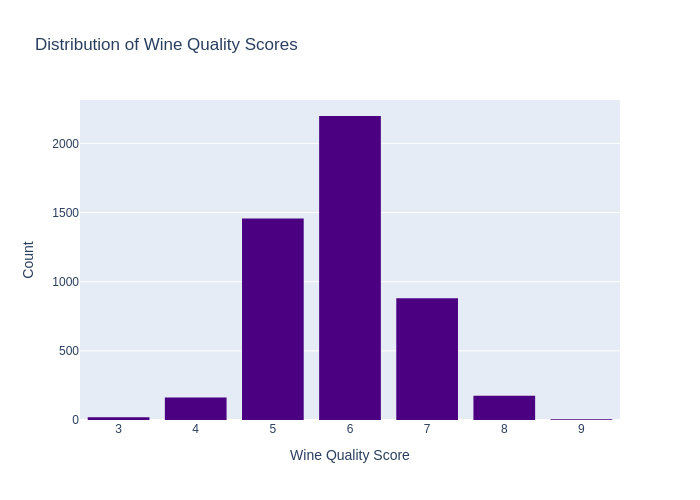

In [ ]:
# Plotting the distribution of the 'quality' variable
fig = px.histogram(df,
                   x='quality',
                   title='Distribution of Wine Quality Scores',
                   color_discrete_sequence=['#4B0082'],
                   ) # Indigo color , size -> width=800,height=800

fig.update_layout(bargap=0.2,
                  xaxis_title="Wine Quality Score",
                  yaxis_title="Count")
fig.show()

# It's clear the dataset is imbalanced, with most wines rated 5, 6, or 7.
# This is important for modeling, as accuracy alone can be a misleading metric.

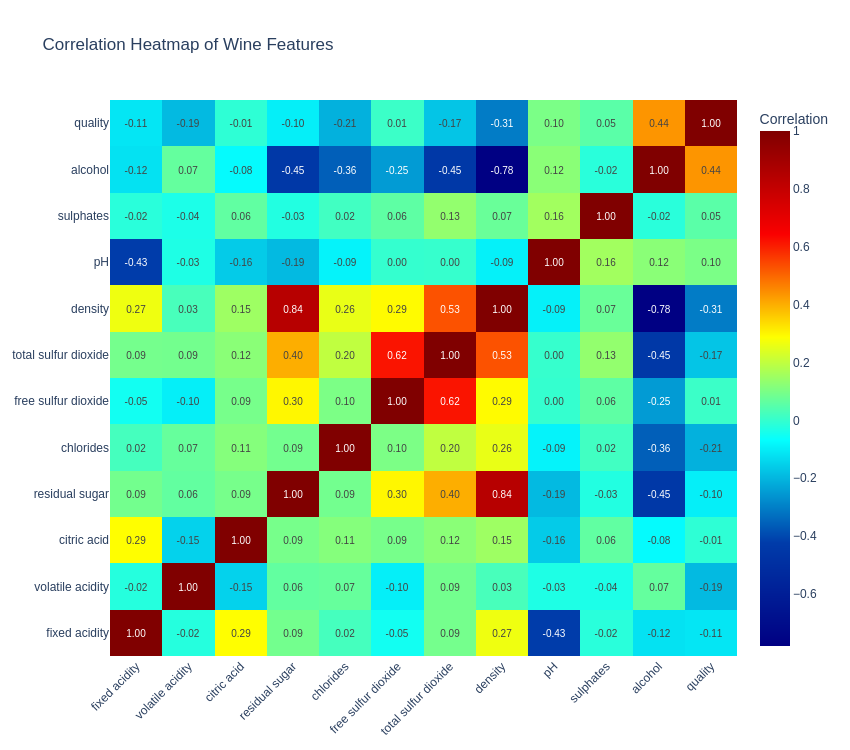

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create the heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
                   z=corr_matrix.values,
                   x=corr_matrix.columns,
                   y=corr_matrix.columns,
                   colorscale='jet',
                   text= corr_matrix.values,
                   texttemplate="%{text:.2f}",
                   textfont={"size":10},
                   colorbar=dict(title='Correlation')))

fig.update_layout(
    title='Correlation Heatmap of Wine Features',
    xaxis_tickangle=-45,
    xaxis_nticks = 36,
    yaxis_nticks = 36,
    height=750,
    width=850
)
fig.show()

# From the heatmap, 'alcohol' has the strongest positive correlation with quality.
# 'density' has the strongest negative correlation.


Top 3 correlated features with quality: ['alcohol', 'density', 'chlorides']


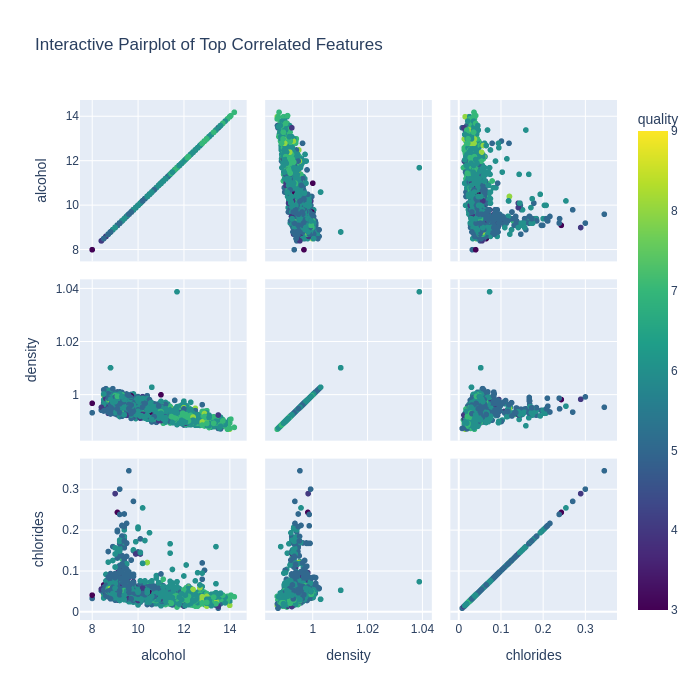

In [ ]:
# Get the top 3 features most correlated with quality (excluding quality itself)
top_features = df.corr()['quality'].abs().sort_values(ascending=False).index[1:4]
print(f"Top 3 correlated features with quality: {list(top_features)}")

# Using the top features plus 'quality' for coloring
top_features_for_pairplot = list(top_features) + ['quality']

fig = px.scatter_matrix(
    df,
    dimensions=top_features,
    color="quality",
    title="Interactive Pairplot of Top Correlated Features",
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.update_layout(height=700)
fig.show()

# Observations:
# - Alcohol: Higher quality wines tend to have higher alcohol content.
# - Density: Higher quality wines tend to have lower density.
# - Chlorides: Higher quality wines tend to have lower chloride levels.


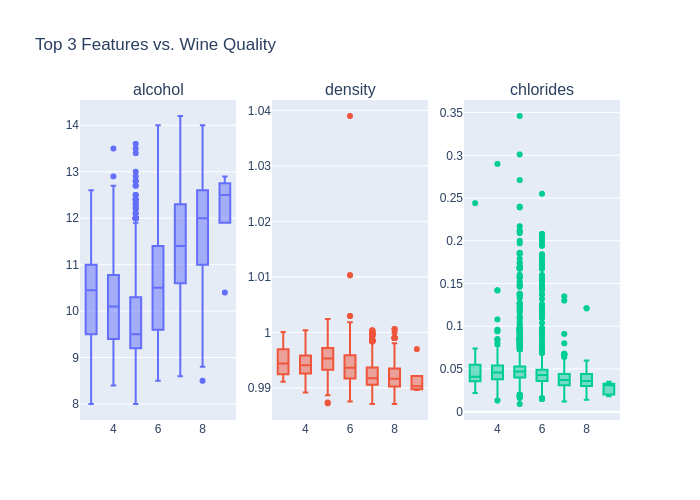

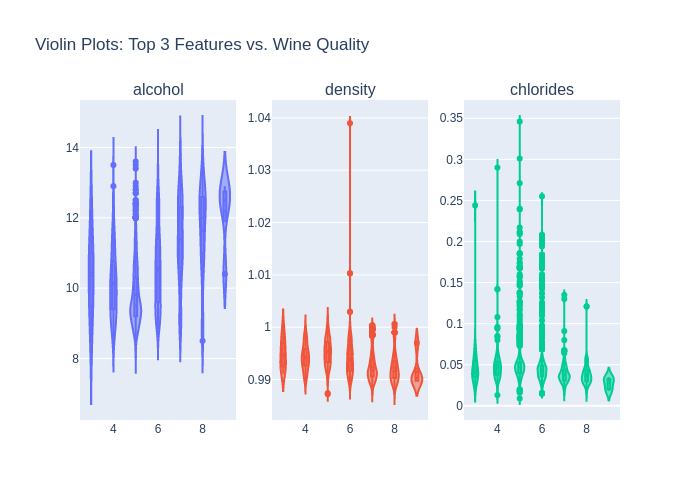

In [ ]:
# Top features vs quality
# Create subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=top_features)

for i, feature in enumerate(top_features):
    fig.add_trace(
        go.Box(x=df['quality'], y=df[feature], name=feature),
        row=1, col=i+1
    )

fig.update_layout(title_text="Top 3 Features vs. Wine Quality", showlegend=False)
fig.show()

# Violin
fig = make_subplots(rows=1, cols=3, subplot_titles=top_features)

for i, feature in enumerate(top_features):
    fig.add_trace(
        go.Violin(x=df['quality'], y=df[feature], name=feature, box_visible=True, meanline_visible=True),
        row=1, col=i+1
    )

fig.update_layout(title_text="Violin Plots: Top 3 Features vs. Wine Quality", showlegend=False)
fig.show()

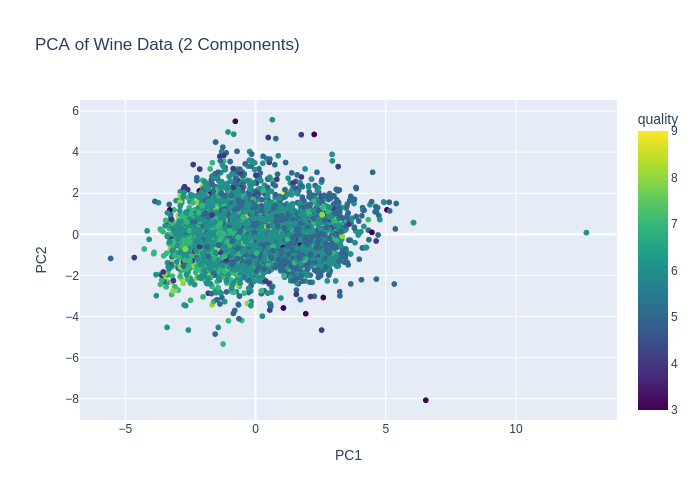

In [ ]:
# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Scale the data before PCA
# Adjusts data to have a mean of 0 and standard deviation of 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA,Principal Component Analysis
# Dimensionality Reduction , transform data to two uncorrelated features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['quality'] = y

# Plot
fig = px.scatter(df_pca, x='PC1', y='PC2', color='quality',
                 title='PCA of Wine Data (2 Components)',
                 color_continuous_scale=px.colors.sequential.Viridis,
                 hover_data=['quality'])
fig.show()

# The plot shows significant overlap between quality classes,
# indicating that a simple linear separation is not possible.


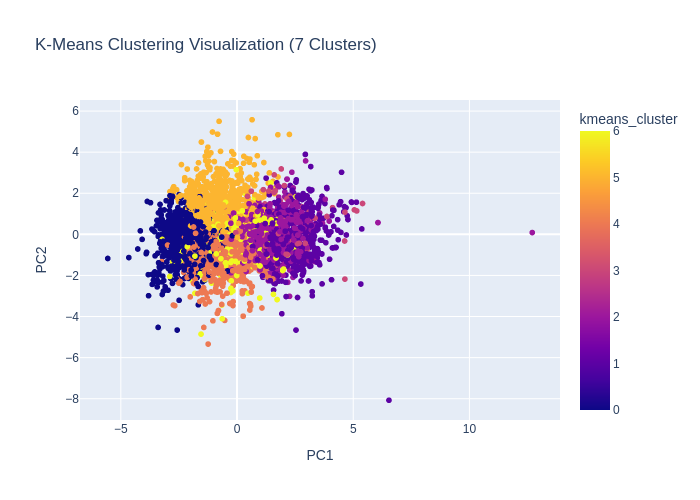

In [ ]:
# Determine the number of clusters (same as unique quality scores)
n_clusters = df['quality'].nunique()

# Apply KMeans
# KMeans - unsupervised  - clustering data points into predefined number of groups, denoted by 'K'
# n_init -  number of times the K-Means algorithm is run with different centroid seeds
# centroid seeds, the central point of a cluster, calculated as the mean of all data points assigned to that cluster
# where each observation belongs to the cluster with the nearest mean, also known as the centroid
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster info to our PCA dataframe
df_pca['kmeans_cluster'] = clusters

# Visualize the clusters
fig = px.scatter(df_pca, x='PC1', y='PC2', color='kmeans_cluster',
                 title=f'K-Means Clustering Visualization ({n_clusters} Clusters)',
                 category_orders={"kmeans_cluster": list(range(n_clusters))},
                 hover_data=['quality'])
fig.show()

# We can see that K-Means finds some structure, but it doesn't perfectly map to the quality scores,
# further confirming the complexity of the problem.


## Data Preparation

In [ ]:
# Define features (X) and target (y)
X = df.drop('quality', axis=1)
y_original = df['quality']

# Encode the labels to be zero-indexed
# why? convert categorical labels into numerical representations,
# which is a necessary step for many machine learning algorithms that require numerical input.
le = LabelEncoder()
y = le.fit_transform(y_original)

# Store the original class names for later interpretation
original_class_names = le.classes_
print(f"Original quality labels: {original_class_names}")
print(f"Encoded labels: {np.unique(y)}")


# Create a dictionary to hold all our datasets
datasets = {}

# 2.1. Original Dataset
# stratify=y -  training and testing sets maintain the same proportion of classes as the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
datasets['Original'] = (X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy())
print("1. Original dataset created.")

# 2.2. StandardScaler Dataset
# the values are centered around the mean with a unit standard deviation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
datasets['Scaled'] = (X_train_scaled, X_test_scaled, y_train.copy(), y_test.copy())
print("2. StandardScaler dataset created.")

# 2.3. PCA Dataset
# dimensionality reduction technique
pca = PCA(n_components=0.95) # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f"3. PCA dataset created with {pca.n_components_} components.")
datasets['PCA'] = (X_train_pca, X_test_pca, y_train.copy(), y_test.copy())

# 2.4. SelectKBest Dataset
# Let's select the top 6 features
k_best = SelectKBest(f_classif, k=6)
X_train_kbest = k_best.fit_transform(X_train_scaled, y_train)
X_test_kbest = k_best.transform(X_test_scaled)
selected_features = X.columns[k_best.get_support()]
print(f"4. SelectKBest dataset created with features: {list(selected_features)}")
datasets['KBest'] = (X_train_kbest, X_test_kbest, y_train.copy(), y_test.copy())

# 2.5. Outlier Removal Dataset
# Anomaly detection By IsolationForest
iso_forest = IsolationForest(contamination='auto', random_state=42)
outliers = iso_forest.fit_predict(X_train_scaled)
X_train_no_outliers = X_train_scaled[outliers == 1]
y_train_no_outliers = y_train[outliers == 1]
print(f"5. Outlier Removal dataset created. Removed {np.sum(outliers == -1)} outliers.")
# We use the original scaled test set for fair comparison
datasets['NoOutliers'] = (X_train_no_outliers, X_test_scaled, y_train_no_outliers, y_test.copy())

print("\nAll datasets are prepared and ready for modeling.")


Original quality labels: [3 4 5 6 7 8 9]
Encoded labels: [0 1 2 3 4 5 6]
1. Original dataset created.
2. StandardScaler dataset created.
3. PCA dataset created with 9 components.
4. SelectKBest dataset created with features: ['volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol']
5. Outlier Removal dataset created. Removed 236 outliers.

All datasets are prepared and ready for modeling.


## MODELING

In [ ]:
# Defining the simple neural network
# input_shape is number of features
# num_classes is the number of possible outcomes to predict
# Sequential is simplest kind of keras model
# 128 is the number of neurons
# relu is learn complex patterns
# activation='softmax' - multi-class classification , raw output to probabilities
# compile is for training
# adam is effective optimizer - internal weights based on the training data - Adaptive Moment Estimation
# optimizer is an algorithm used to adjust the weights and biases of a neural network during the training process
# categorical_crossentropy it measures how well model predicted
# metrics=['accuracy'] - calculate accuracy during training
def create_nn(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape), # first Desnse layer
        Dropout(0.3), # prevent overfitting , 0.3 neuron is active
        Dense(64, activation='relu'),# second layer
        Dropout(0.3),
        Dense(num_classes, activation='softmax')#final output layer
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Logistic Regression - classification - linear regressions + sigmoid
# K-Nearest Neighbors - make predictions based on nearest samples
# SVC - find best boundary to seprate diffrent classes
# Random forest - group of decision trees
# Gradient Boosting - each new tree try to fix the mistake of previous tree
# XGBoost optimized and improved vesion of Gradient boosting - faster - more efficient
# faster more memory efficient for working very large dataset
# Catboost working with catgorical features no need for one-hot encoding

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42), # max_iter = 1000 to reach a stable solution
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42, probability=True), # Enable probability for LIME
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
    "Neural Network": "NN_PLACEHOLDER" # Special case
}

# Store results
results = []

if 'datasets' in locals():
    # Loop through each dataset
    for d_name, (X_tr, X_te, y_tr, y_te) in datasets.items():
        print(f"--- Processing Dataset: {d_name} ---")

        # Loop through each model
        for m_name, model in models.items():
            start_time = time.time()

            if m_name == "Neural Network":
                # Handle NN separately
                input_shape = (X_tr.shape[1],)
                num_classes = len(np.unique(y_tr))

                # Adjust y for NN
                y_tr_nn_current = to_categorical(y_tr, num_classes=len(original_class_names))
                y_te_nn_current = to_categorical(y_te, num_classes=len(original_class_names))

                nn_model = create_nn(input_shape, len(original_class_names))
                nn_model.fit(X_tr, y_tr_nn_current, epochs=20, batch_size=32, verbose=0)
                y_pred_probs = nn_model.predict(X_te)
                y_pred = np.argmax(y_pred_probs, axis=1)
            else:
                # For all other models
                model.fit(X_tr, y_tr)
                y_pred = model.predict(X_te)

            end_time = time.time()

            # Calculate metrics
            train_time = end_time - start_time
            accuracy = accuracy_score(y_te, y_pred)
            f1 = f1_score(y_te, y_pred, average='weighted')

            # Store results
            results.append({
                'Dataset': d_name,
                'Model': m_name,
                'Accuracy': accuracy,
                'F1 Score': f1,
                'Training Time (s)': train_time
            })

            print(f"  {m_name}: F1 Score = {f1:.4f}, Time = {train_time:.2f}s")

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)

    print("\n--- Model Comparison Complete ---")
    display(results_df.sort_values(by='F1 Score', ascending=False).head(10))


--- Processing Dataset: Original ---
  Logistic Regression: F1 Score = 0.4999, Time = 7.90s
  K-Nearest Neighbors: F1 Score = 0.4332, Time = 0.07s
  Support Vector Machine: F1 Score = 0.2840, Time = 12.42s
  Random Forest: F1 Score = 0.6685, Time = 2.79s
  Gradient Boosting: F1 Score = 0.5620, Time = 15.74s
  XGBoost: F1 Score = 0.6459, Time = 16.25s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 3918, number of used features: 11
[LightGBM] [Info] Start training from score -5.500748
[LightGBM] [Info] Start training from score -3.405802
[LightGBM] [Info] Start training from score -1.212002
[LightGBM] [Info] Start training from score -0.801405
[LightGBM] [Info] Start training from score -1.716558
[LightGBM

Dataset          Model  Accuracy  F1 Score  Training Time (s)
3     Original  Random Forest  0.679592  0.668460           2.792717
12      Scaled  Random Forest  0.675510  0.664390           1.093684
39  NoOutliers  Random Forest  0.670408  0.657760           1.040025
21         PCA  Random Forest  0.656122  0.645927           1.715774
5     Original        XGBoost  0.654082  0.645863          16.254417
14      Scaled        XGBoost  0.654082  0.645863           1.706021
25         PCA       CatBoost  0.646939  0.641398          25.126745
30       KBest  Random Forest  0.643878  0.635521           0.884822
15      Scaled       LightGBM  0.638776  0.630696           1.329135
41  NoOutliers        XGBoost  0.637755  0.629836           5.097807

## Compare models

Best Combination:
Dataset                   Original
Model                Random Forest
Accuracy                  0.679592
F1 Score                   0.66846
Training Time (s)         2.792717
Name: 3, dtype: object


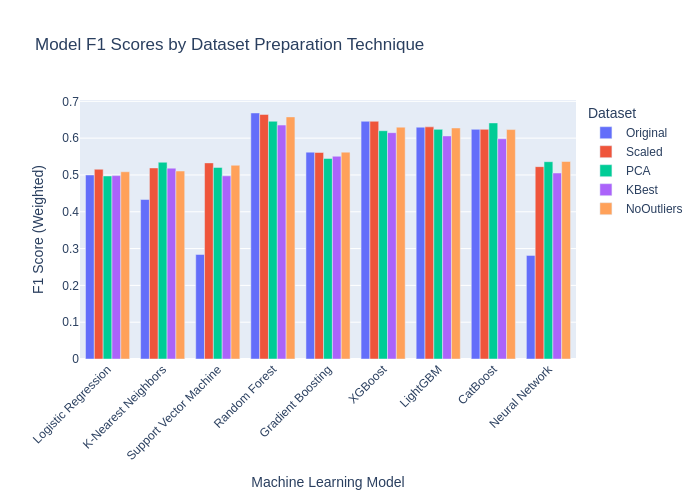

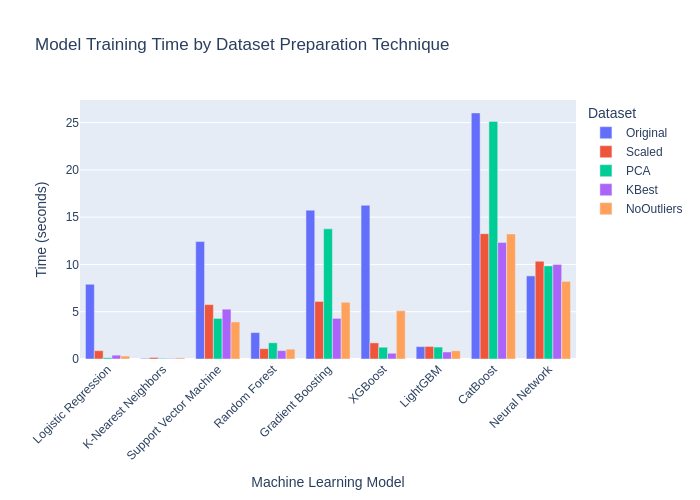

In [ ]:
if 'results_df' in locals():
    # Find the best combination
    best_result = results_df.loc[results_df['F1 Score'].idxmax()]
    print(f"Best Combination:\n{best_result}")

    # Plot F1 Scores
    fig1 = px.bar(results_df, x='Model', y='F1 Score', color='Dataset',
                  barmode='group',
                  title='Model F1 Scores by Dataset Preparation Technique',
                  labels={'F1 Score': 'F1 Score (Weighted)', 'Model': 'Machine Learning Model'})
    fig1.update_layout(xaxis_tickangle=-45)
    fig1.show()

    # Plot Training Times
    fig2 = px.bar(results_df, x='Model', y='Training Time (s)', color='Dataset',
                  barmode='group',
                  title='Model Training Time by Dataset Preparation Technique',
                  labels={'Training Time (s)': 'Time (seconds)', 'Model': 'Machine Learning Model'})
    fig2.update_layout(xaxis_tickangle=-45)
    fig2.show()


## SHAP and LIME

Using feature names for SHAP/LIME: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Explaining the 'Random Forest' model trained on the 'Original' dataset.

--- Running SHAP Analysis ---
Displaying SHAP Summary Bar Plot (Global Feature Importance)...


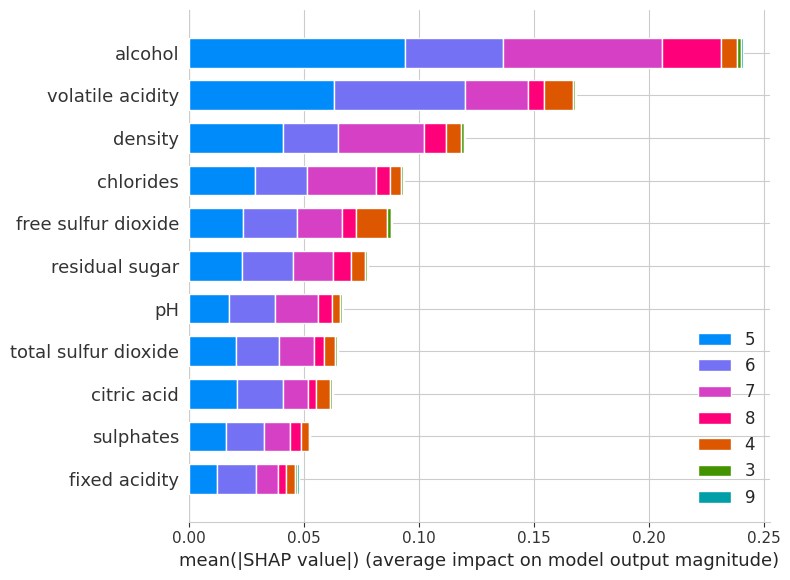


Displaying SHAP Beeswarm Plot for all classes...


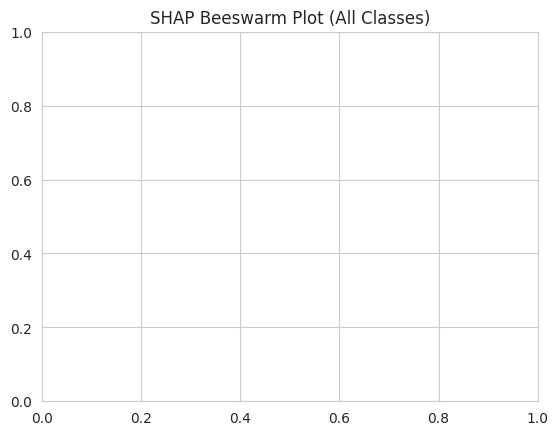

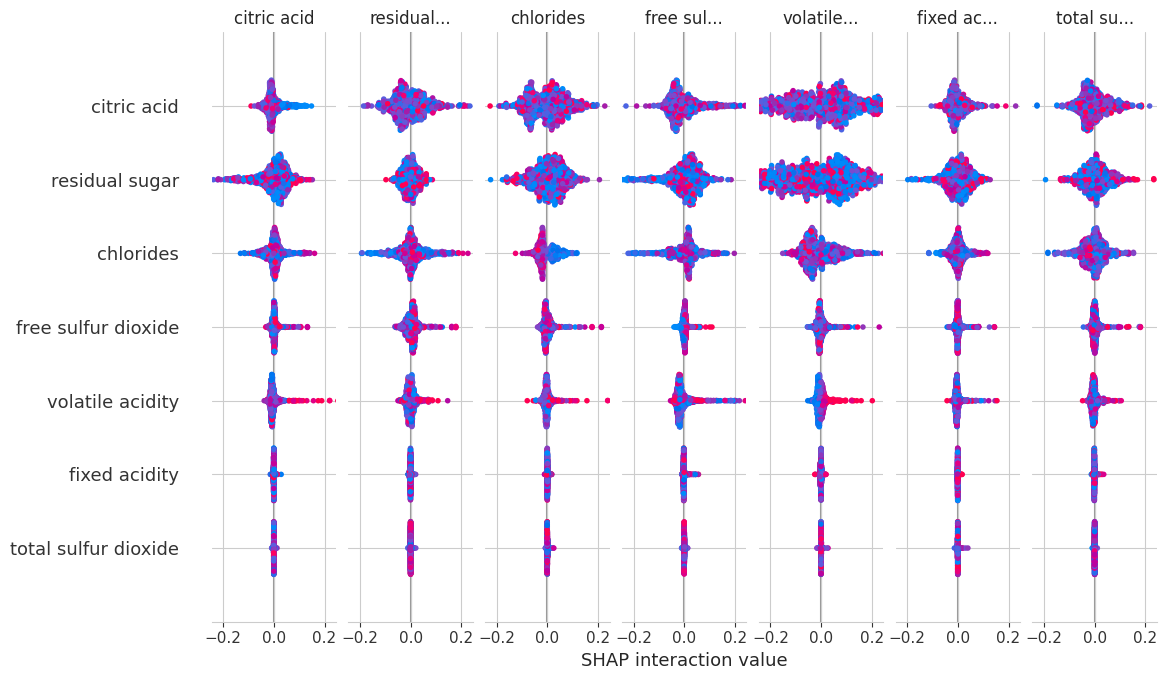


Initializing SHAP JavaScript visualization...


Displaying interactive SHAP Force Plot for Quality = 6 (class index 3)...



--- Running LIME Analysis ---

Explaining prediction for instance #5 with LIME...


DONE


In [ ]:
if 'results_df' in locals() and 'datasets' in locals():
    # --- Setup for Explainability ---
    # We will use the best model identified previously.
    best_result = results_df.loc[results_df['F1 Score'].idxmax()]
    best_model_name = best_result['Model']
    best_dataset_name = best_result['Dataset']

    X_train_best, X_test_best, y_train_best, y_test_best = datasets[best_dataset_name]

    # Determine the correct feature names based on the dataset used
    if best_dataset_name in ['Original', 'Scaled', 'NoOutliers']:
        correct_feature_names = df.drop('quality', axis=1).columns.tolist()
    elif best_dataset_name == 'KBest':
        correct_feature_names = selected_features.tolist()
    elif best_dataset_name == 'PCA':
        correct_feature_names = [f'PC{i+1}' for i in range(X_test_best.shape[1])]
    else: # Fallback
        correct_feature_names = [f'feature_{i}' for i in range(X_test_best.shape[1])]

    print(f"Using feature names for SHAP/LIME: {correct_feature_names}")

    # Re-train the best model
    if best_model_name == "Neural Network":
        print("Neural Network was the best model. SHAP TreeExplainer is not compatible. Skipping explainability.")
    else:
        # Instantiate a new model object
        best_model = models[best_model_name]
        best_model.fit(X_train_best, y_train_best)

        print(f"Explaining the '{best_model_name}' model trained on the '{best_dataset_name}' dataset.")

        # --- 1. SHAP (SHapley Additive exPlanations) ---
        print("\n--- Running SHAP Analysis ---")

        explainer_shap = shap.TreeExplainer(best_model)
        shap_values = explainer_shap.shap_values(X_test_best)

        # Global Feature Importance Plot (Summary Bar Plot)
        print("Displaying SHAP Summary Bar Plot (Global Feature Importance)...")
        shap.summary_plot(shap_values, X_test_best, plot_type="bar", class_names=original_class_names, feature_names=correct_feature_names)

        # Beeswarm plot for all classes
        print("\nDisplaying SHAP Beeswarm Plot for all classes...")
        plt.title("SHAP Beeswarm Plot (All Classes)")
        shap.summary_plot(shap_values, X_test_best, feature_names=correct_feature_names, class_names=original_class_names)

        # --- Interactive Force Plot ---
        print("\nInitializing SHAP JavaScript visualization...")
        shap.initjs()

        # Choose a class to explain, for example, the class for quality '6'
        quality_to_explain = 6
        # Find the index corresponding to our chosen quality score
        class_index_to_explain = np.where(le.classes_ == quality_to_explain)[0][0]

        print(f"Displaying interactive SHAP Force Plot for Quality = {quality_to_explain} (class index {class_index_to_explain})...")

        # *** DEFINITIVE FIX: Handle both list and 3D array formats for shap_values ***
        shap_values_for_class = None
        expected_value_for_class = None

        if isinstance(shap_values, list):
            # Format: List of arrays (e.g., from RandomForest)
            shap_values_for_class = shap_values[class_index_to_explain]
            expected_value_for_class = explainer_shap.expected_value[class_index_to_explain]
        else:
            # Format: 3D array (e.g., from LightGBM) of shape (n_samples, n_features, n_classes)
            shap_values_for_class = shap_values[:, :, class_index_to_explain]
            expected_value_for_class = explainer_shap.expected_value[class_index_to_explain]

        # This creates a stable, interactive plot for all instances in the test set for the chosen class.
        display(shap.force_plot(expected_value_for_class,
                                shap_values_for_class,
                                pd.DataFrame(X_test_best, columns=correct_feature_names)))

        # --- 2. LIME (Local Interpretable Model-agnostic Explanations) ---
        print("\n--- Running LIME Analysis ---")

        # Convert the training data DataFrame to a NumPy array
        # LIME needs a numpy array for the training_data parameter.
        explainer_lime = lime.lime_tabular.LimeTabularExplainer(
            training_data=X_train_best.to_numpy(), # Use .to_numpy() here
            feature_names=correct_feature_names,
            class_names=[str(c) for c in original_class_names],
            mode='classification'
        )

        instance_idx_lime = 5
        print(f"\nExplaining prediction for instance #{instance_idx_lime} with LIME...")

        # --- FIX 2: Select the row correctly and convert it to a NumPy array ---
        # Use .iloc to select the row by its integer position, then convert to numpy.
        instance_to_explain = X_test_best.iloc[instance_idx_lime].to_numpy()

        explanation = explainer_lime.explain_instance(
            instance_to_explain, # Pass the converted numpy array
            best_model.predict_proba,
            num_features=len(correct_feature_names),
            top_labels=1
        )

        explanation.show_in_notebook(show_table=True, show_all=False)
        print("DONE")